### Machine Learning for Engineers: [Classification Overview](https://www.apmonitor.com/pds/index.php/Main/ClassificationOverview)
- [Classification with Machine Learning](https://www.apmonitor.com/pds/index.php/Main/ClassificationOverview)
 - Description: Supervised and unsupervised machine learning methods make a classification decision based on feature inputs.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

**Classify Images of Digits**

<img align="left" src="https://apmonitor.com/pds/uploads/Main/classify_numbers.png" width="600"/>

Predicted: 3


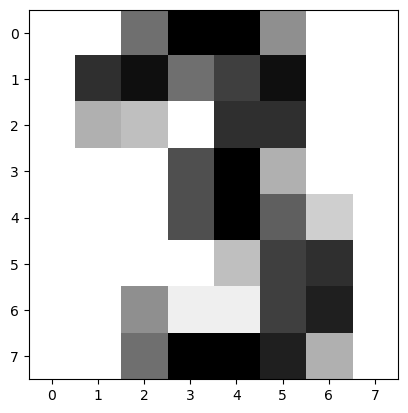

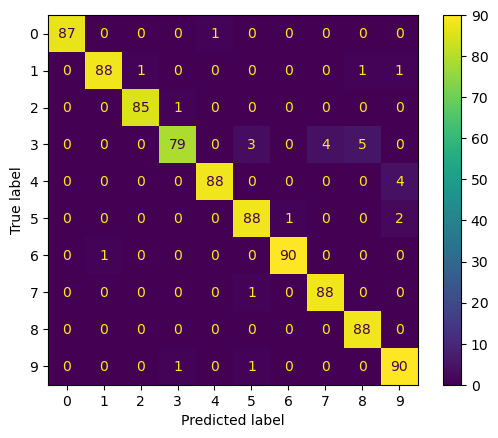

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split into train and test subsets (50% each)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# test on second half of data
n = np.random.randint(int(n_samples/2),n_samples)
plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
print('Predicted: ' + str(classifier.predict(digits.data[n:n+1])[0]))

# Get the predictions from the classifier
predictions = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [2]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [11]:
from lazypredict.Supervised import LazyClassifier, CLASSIFIERS
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=.5,random_state=12)

# exclude classifiers
clf_select = []
exclude = ['LGBMClassifier', 'DummyClassifier']
for x in CLASSIFIERS:
    if not any(x[0] == ex for ex in exclude):
        clf_select.append(x[1])

clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None,classifiers=clf_select)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models.to_csv('models.csv')
models

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:02<00:00,  9.17it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.98,0.98,None,0.98,0.11
ExtraTreesClassifier,0.97,0.97,None,0.97,0.22
RandomForestClassifier,0.97,0.97,None,0.97,0.28
KNeighborsClassifier,0.96,0.96,None,0.96,0.05
LogisticRegression,0.96,0.96,None,0.96,0.03
XGBClassifier,0.96,0.96,None,0.96,0.28
CalibratedClassifierCV,0.95,0.95,None,0.95,0.82
LinearDiscriminantAnalysis,0.95,0.95,None,0.95,0.02
SGDClassifier,0.95,0.95,None,0.95,0.04


Train Classifiers
nb time: 0.003
lr time: 0.05601
sgd time: 0.02401
knn time: 0.001
dt time: 0.01
rfm time: 0.52912
svm time: 0.02601
nn time: 0.27906
Test Classifiers
nb predicts: 5 time: 0.001
lr predicts: 5 time: 0.0
sgd predicts: 5 time: 0.0
knn predicts: 5 time: 0.04101
dt predicts: 5 time: 0.0
rfm predicts: 5 time: 0.005
svm predicts: 5 time: 0.0
nn predicts: 5 time: 0.0
Label: 5


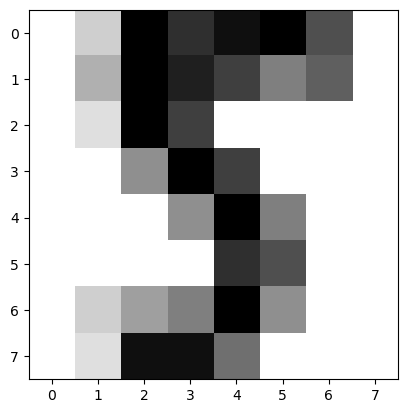

In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import time

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=2000)

# NaÃ¯ve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101,\
                    tol=1e-3,max_iter=1000)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,\
                               max_features=None,min_samples_leaf=5)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
                  random_state=101,max_features=None,min_samples_leaf=3)

# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)

# Neural Network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)

# classification methods
m = [nb,lr,sgd,knn,dtree,rfm,svm,nn]
s = ['nb','lr','sgd','knn','dt','rfm','svm','nn']

# fit classifiers
print('Train Classifiers')
for i,x in enumerate(m):
    st = time.time()
    x.fit(XA,yA)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' time: ' + tf)

# test on random number in second half of data
n = np.random.randint(int(n_samples/2),n_samples)
Xt = digits.data[n:n+1]

# test classifiers
print('Test Classifiers')
for i,x in enumerate(m):
    st = time.time()
    yt = x.predict(Xt)
    tf = str(round(time.time()-st,5))
    print(s[i] + ' predicts: ' + str(yt[0]) + ' time: ' + tf)
print('Label: ' + str(digits.target[n:n+1][0]))

plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

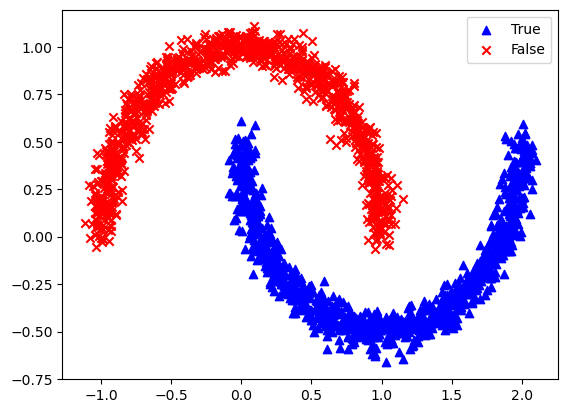

In [5]:
select_option = 3

data_options = ['linear','quadratic','target','moons','circles','blobs']
option = data_options[select_option]
n = 2000 # number of data points

X = np.random.random((n,2))
mixing = 0.0 # add random mixing element to data
xplot = np.linspace(0,1,100)

if option=='linear':
    y = np.array([False if (X[i,0]+X[i,1])>=(1.0+mixing/2-np.random.rand()*mixing) \
                    else True \
                  for i in range(n)])
    yplot = 1-xplot
elif option=='quadratic':
    y = np.array([False if X[i,0]**2>=X[i,1]+(np.random.rand()-0.5)*mixing \
                    else True \
                  for i in range(n)])
    yplot = xplot**2
elif option=='target':
    y = np.array([False if (X[i,0]-0.5)**2+(X[i,1]-0.5)**2<=0.1 +(np.random.rand()-0.5)*0.2*mixing \
                    else True \
                  for i in range(n)])
    j = False
    yplot = np.empty(100)
    for i,x in enumerate(xplot):
        r = 0.1-(x-0.5)**2
        if r<=0:
            yplot[i] = np.nan
        else:
            j = not j # plot both sides of circle
            yplot[i] = (2*j-1)*np.sqrt(r)+0.5
elif option=='moons':
    X, y = datasets.make_moons(n_samples=n,noise=0.05)
    yplot = xplot*0.0
elif option=='circles':
    X, y = datasets.make_circles(n_samples=n,noise=0.05,factor=0.5)
    yplot = xplot*0.0
elif option=='blobs':
    X, y = datasets.make_blobs(n_samples=n,centers=[[-5,3],[5,-3]],cluster_std=2.0)
    yplot = xplot*0.0

plt.scatter(X[y>0.5,0],X[y>0.5,1],color='blue',marker='^',label='True')
plt.scatter(X[y<0.5,0],X[y<0.5,1],color='red',marker='x',label='False')
if option not in ['moons','circles','blobs']:
    plt.plot(xplot,yplot,'k.',label='Division')
plt.legend()

# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(X, y, test_size=0.5, shuffle=False)

# Plot regression results
def assess(P):
    plt.figure()
    plt.scatter(XB[P==1,0],XB[P==1,1],marker='^',color='blue',label='True')
    plt.scatter(XB[P==0,0],XB[P==0,1],marker='x',color='red',label='False')
    plt.scatter(XB[P!=yB,0],XB[P!=yB,1],marker='s',color='orange',alpha=0.5,label='Incorrect')
    if option not in ['moons','circles','blobs']:
        plt.plot(xplot,yplot,'k.',label='Division')
    plt.legend()

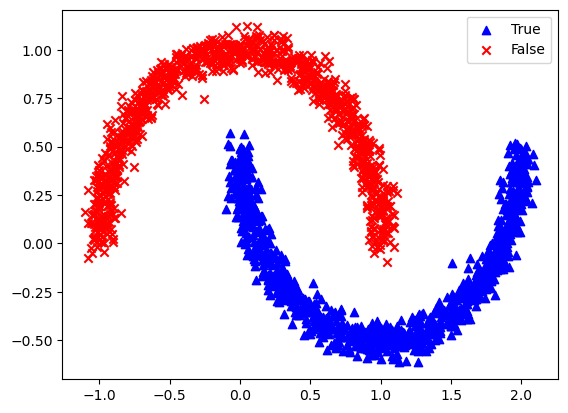

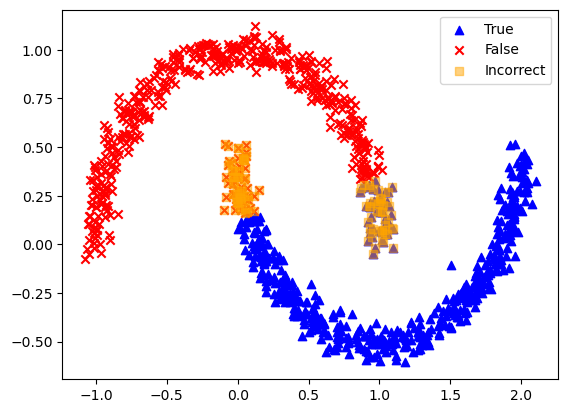

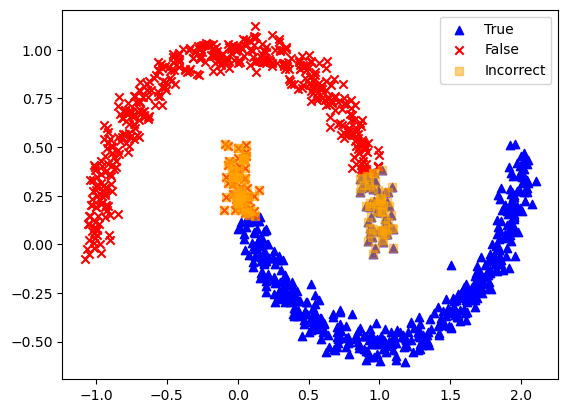

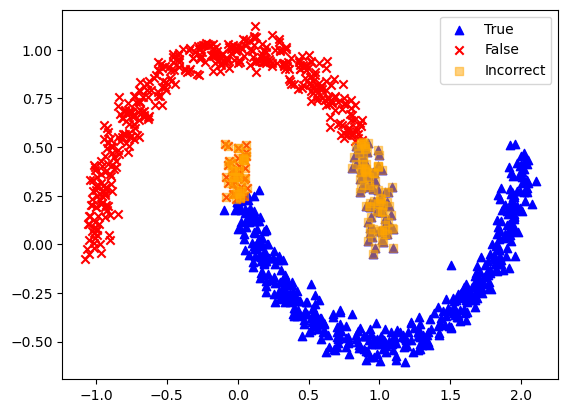

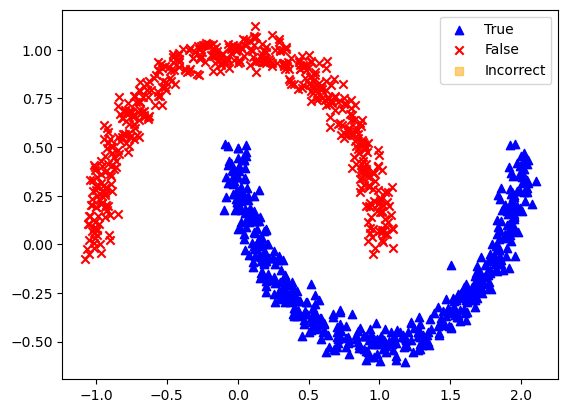

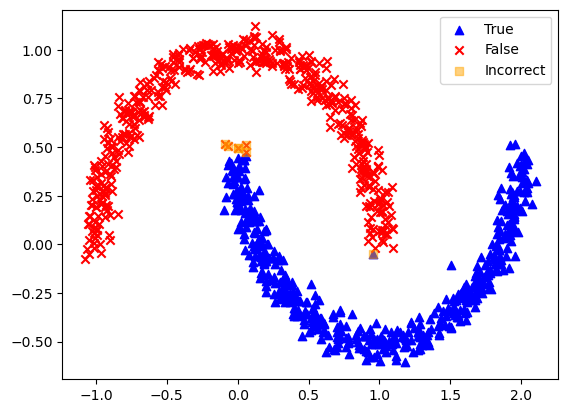

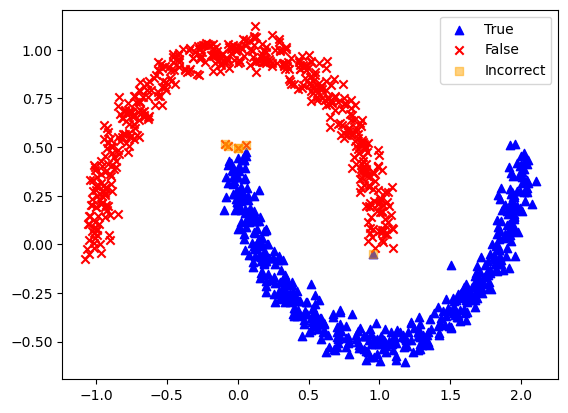

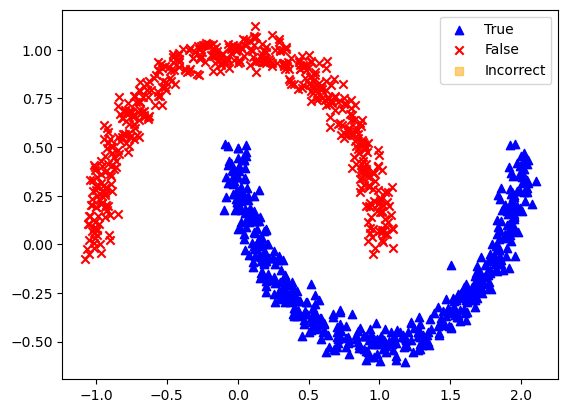

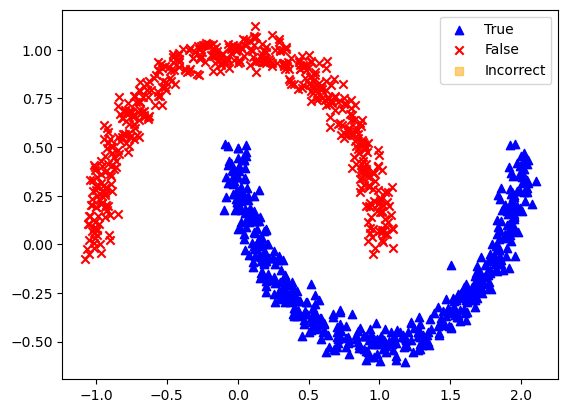

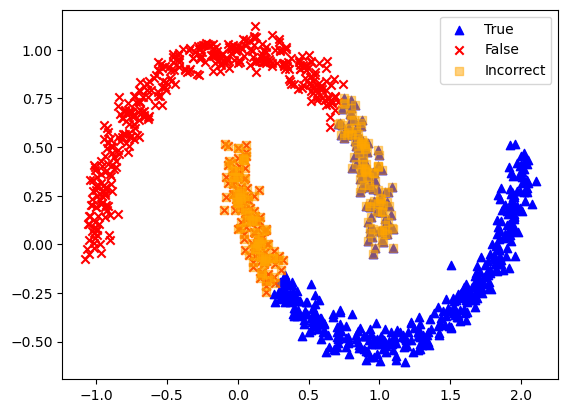

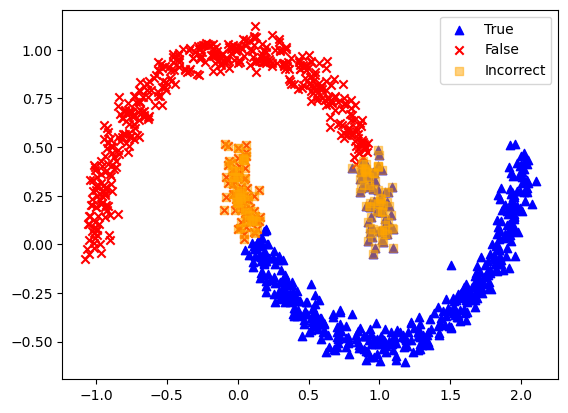

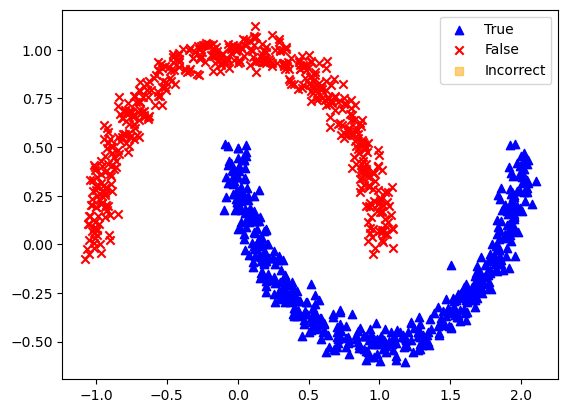

In [6]:
# Select Option by Number
# 0 = Linear, 1 = Quadratic, 2 = Inner Target
# 3 = Moons, 4 = Concentric Circles, 5 = Distinct Clusters
select_option = 3

# generate data
data_options = ['linear','quadratic','target','moons','circles','blobs']
option = data_options[select_option]
# number of data points
n = 2000
X = np.random.random((n,2))
mixing = 0.0 # add random mixing element to data
xplot = np.linspace(0,1,100)

if option=='linear':
    y = np.array([False if (X[i,0]+X[i,1])>=(1.0+mixing/2-np.random.rand()*mixing) else True for i in range(n)])
    yplot = 1-xplot
elif option=='quadratic':
    y = np.array([False if X[i,0]**2>=X[i,1]+(np.random.rand()-0.5)\
                  *mixing else True for i in range(n)])
    yplot = xplot**2
elif option=='target':
    y = np.array([False if (X[i,0]-0.5)**2+(X[i,1]-0.5)**2<=0.1 +(np.random.rand()-0.5)*0.2*mixing else True for i in range(n)])
    j = False
    yplot = np.empty(100)
    for i,x in enumerate(xplot):
        r = 0.1-(x-0.5)**2
        if r<=0:
            yplot[i] = np.nan
        else:
            j = not j # plot both sides of circle
            yplot[i] = (2*j-1)*np.sqrt(r)+0.5
elif option=='moons':
    X, y = datasets.make_moons(n_samples=n,noise=0.05)
    yplot = xplot*0.0
elif option=='circles':
    X, y = datasets.make_circles(n_samples=n,noise=0.05,factor=0.5)
    yplot = xplot*0.0
elif option=='blobs':
    X, y = datasets.make_blobs(n_samples=n,centers=[[-5,3],[5,-3]],cluster_std=2.0)
    yplot = xplot*0.0

plt.scatter(X[y>0.5,0],X[y>0.5,1],color='blue',marker='^',label='True')
plt.scatter(X[y<0.5,0],X[y<0.5,1],color='red',marker='x',label='False')
if option not in ['moons','circles','blobs']:
    plt.plot(xplot,yplot,'k.',label='Division')
plt.legend()
plt.savefig(str(select_option)+'.png')

# Split into train and test subsets (50% each)
XA, XB, yA, yB = train_test_split(X, y, test_size=0.5, shuffle=False)

# Plot regression results
def assess(P):
    plt.figure()
    plt.scatter(XB[P==1,0],XB[P==1,1],marker='^',color='blue',label='True')
    plt.scatter(XB[P==0,0],XB[P==0,1],marker='x',color='red',label='False')
    plt.scatter(XB[P!=yB,0],XB[P!=yB,1],marker='s',color='orange',alpha=0.5,label='Incorrect')
    if option not in ['moons','circles','blobs']:
        plt.plot(xplot,yplot,'k.',label='Division')
    plt.legend()

# Supervised Classification

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(XA,yA)
yP = lr.predict(XB)
assess(yP)

# NaÃ¯ve Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(XA,yA)
yP = nb.predict(XB)
assess(yP)

# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(XA,yA)
yP = sgd.predict(XB)
assess(yP)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XA,yA)
yP = knn.predict(XB)
assess(yP)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,\
                       min_samples_leaf=5)
dtree.fit(XA,yA)
yP = dtree.predict(XB)
assess(yP)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=1,\
                  random_state=101,max_features=None,min_samples_leaf=3)
rfm.fit(XA,yA)
yP = rfm.predict(XB)
assess(yP)

# Support Vector Classifier
from sklearn.svm import SVC
svm = SVC(gamma='scale', C=1.0, random_state=101)
svm.fit(XA,yA)
yP = svm.predict(XB)
assess(yP)

# Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)
clf.fit(XA,yA)
yP = clf.predict(XB)
assess(yP)

# Unsupervised Classification

# K-Means Clustering
try:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=2)
    km.fit(XA)
    yP = km.predict(XB)
    # Arbitrary labels with unsupervised clustering may need to be reversed
    if len(XB[yP!=yB]) > n/4: yP = 1 - yP 
    assess(yP)
except:
    print('K-Means failed')
    
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(XA)
yP = gmm.predict_proba(XB) # produces probabilities
# Arbitrary labels with unsupervised clustering may need to be reversed
if len(XB[np.round(yP[:,0])!=yB]) > n/4: yP = 1 - yP 
assess(np.round(yP[:,0]))

# Spectral Clustering
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2,eigen_solver='arpack',\
                        affinity='nearest_neighbors')
yP = sc.fit_predict(XB) # No separation between fit and predict calls, 
                        #    need to fit and predict on same dataset
# Arbitrary labels with unsupervised clustering may need to be reversed
if len(XB[yP!=yB]) > n/4: yP = 1 - yP 
assess(yP)

plt.show()